In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing

# Load Data

In [2]:
raw_housing_price = pd.read_csv('housing.csv.zip')
raw_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
raw_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
raw_housing_price.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Clean Data

In [5]:
raw_housing_price.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [6]:
raw_housing_price.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Drop total_bedrooms, because the correlation is only 0.049686.
cleaned_housing_price = raw_housing_price.drop('total_bedrooms', axis = 1)
cleaned_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value ocean_proximity  
0       126.0         8.3252            452600.0        NEAR BAY  
1      1138.0         8.3014            358500.0        NEAR BAY  
2       177.0         7.2574            352100.0        NEAR BAY  
3       219.0         5.6431            341300.0        NEAR BAY  
4       259.0         3.8462            342200.0        NEAR BAY

In [8]:
# Replace ocean_proximity by Numbers
raw_housing_price["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
cleaned_housing_price = cleaned_housing_price.replace({'ISLAND':0, 'NEAR BAY':1, 'NEAR OCEAN':2, '<1H OCEAN':3, 'INLAND':4})
cleaned_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value  ocean_proximity  
0       126.0         8.3252            452600.0                1  
1      1138.0         8.3014            358500.0                1  
2       177.0         7.2574            352100.0                1  
3       219.0         5.6431            341300.0                1  
4       259.0         3.8462            342200.0                1

In [10]:
cleaned_housing_price['ocean_proximity'].value_counts()

3    9136
4    6551
2    2658
1    2290
0       5
Name: ocean_proximity, dtype: int64

# Inspect Data

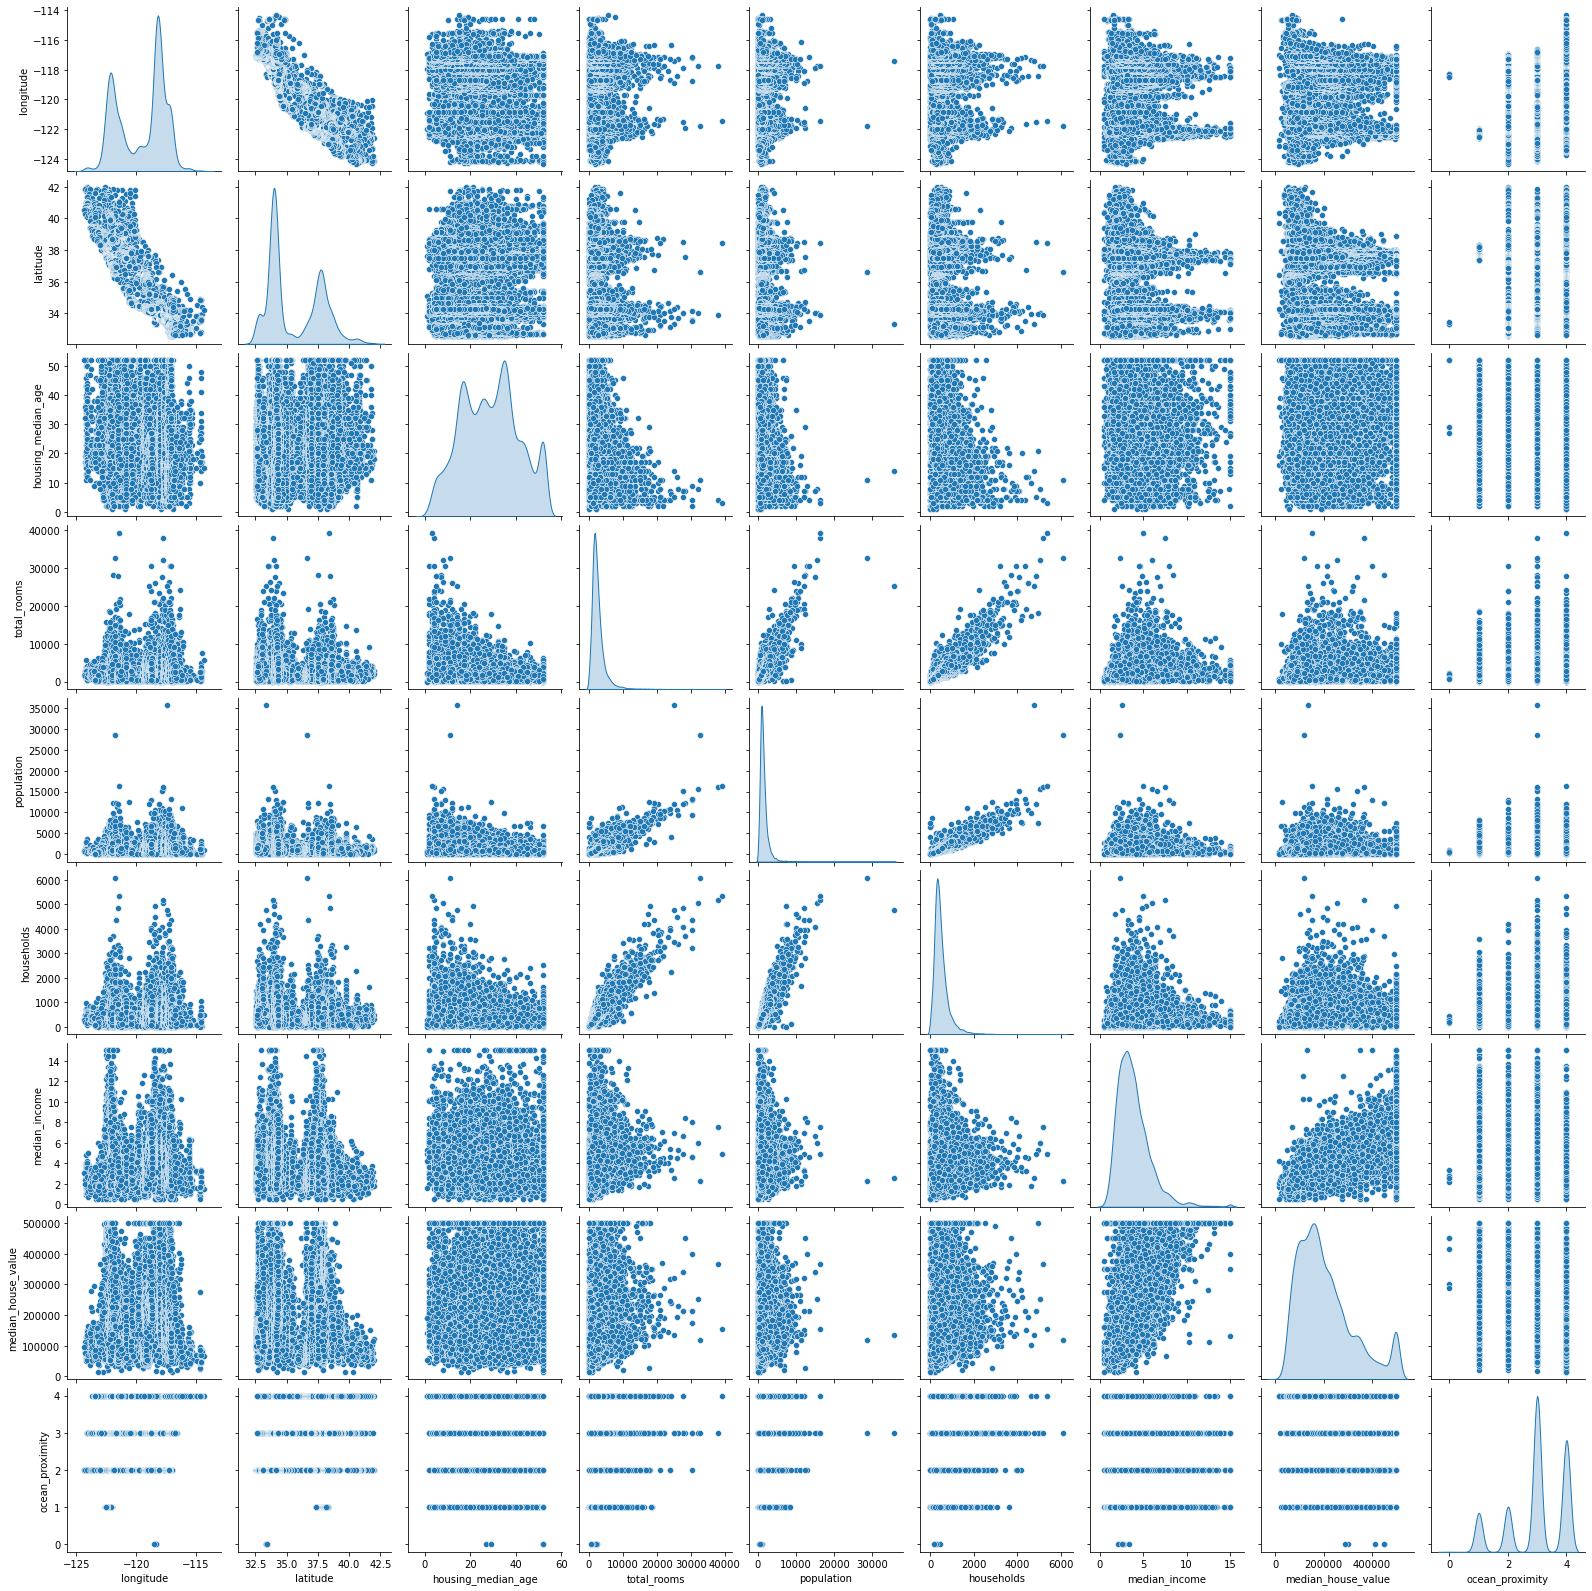

In [11]:
sns.pairplot(cleaned_housing_price[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']], diag_kind='kde')

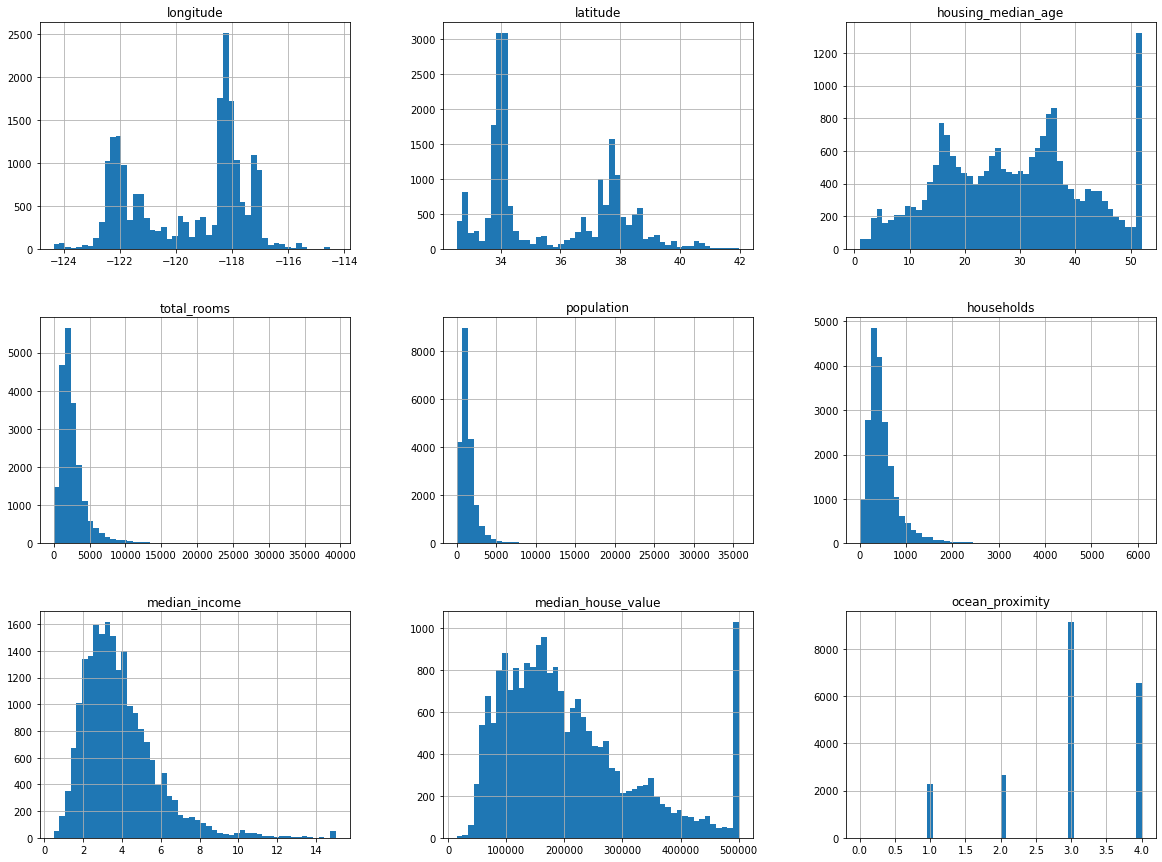

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_housing_price.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
cleaned_housing_price.describe().transpose()

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   
ocean_proximity     20640.0       2.965988       0.943948      0.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000  
ocean_proximity          3.0000       3.0000       4.00000       4.0000

# Build Model

In [14]:
cleaned_housing_price.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity      0.271730 -0.007695           -0.295012     0.031586   

                    population  households  median_income  median_house_value  \
longitude             0.099773    0.055310      -0.015176           -0.045967   
latitude             -0.108785   -0.071035      -0.079809           -0.144160   
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623   
total_rooms           0.857126    0.918484       0.198050            0.134153   
population            1.000000    0.907222       0.004834           -0.024650   
households            0.907222    1.000000       0.013033            0.065843   
median_income         0.004834    0.013033       1.000000            0.688075   
median_house_value   -0.024650    0.065843       0.688075            1.000000   
ocean_proximity       0.039415   -0.012873      -0.163755           -0.397251   

                    ocean_proximity  
longitude                  0.271730  
latitude                  -0.007695  
housing_median_age        -0.295012  
total_rooms                0.031586  
population                 0.039415  
households                -0.012873  
median_income             -0.163755  
median_house_value        -0.397251  
ocean_proximity            1.000000

In [15]:
# Drop target
cleaned_housing_price_data_only = cleaned_housing_price.drop(['median_house_value'], axis=1)
# Drop target, longitude(-0.0459), population(-0.0246), households(0.065843)
X = cleaned_housing_price.drop(['median_house_value', 'longitude', 'population', 'households'], axis=1)
# Target
y = cleaned_housing_price.median_house_value

## Fitting Linear Regression using statsmodel

In [16]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
# Only use relevant columns: latitude, housing_median_age, total_rooms, median_income, ocean_proximity
m = ols('median_house_value ~ latitude + housing_median_age + total_rooms + median_income + ocean_proximity', cleaned_housing_price).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     5673.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        10:34:12   Log-Likelihood:            -2.6094e+05
No. Observations:               20640   AIC:                         5.219e+05
Df Residuals:                   20634   BIC:                         5.219e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.885e+05   9433

## Fitting Linear Regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [19]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Matches the statsmodel')

Estimated intercept coefficient: 288522.8770379376
Matches the statsmodel


In [20]:
# The coefficientspd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

features  estimatedCoefficients
0            latitude           -5089.968718
1  housing_median_age            1176.758851
2         total_rooms               3.069015
3       median_income           39013.154719
4     ocean_proximity          -31389.216774

In [21]:
predicted = lm.predict(X)
pd.DataFrame({'predicted': predicted, 'price': y})[['predicted', 'price']]

predicted     price
0      440065.806876  452600.0
1      434790.119449  358500.0
2      413306.118405  352100.0
3      349734.862876  341300.0
4      280715.487401  342200.0
...              ...       ...
20635   57415.151276   78100.0
20636   85032.741941   77100.0
20637   55513.366359   92300.0
20638   62003.932831   84700.0
20639   83136.110852   89400.0

[20640 rows x 2 columns]

Text(0, 0.5, 'Frequency')

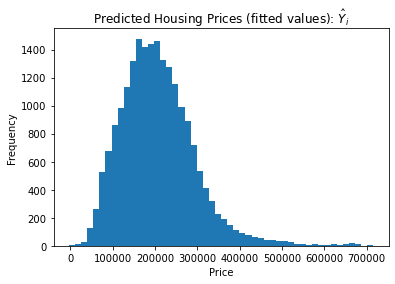

In [22]:
plt.hist(predicted, bins = 50)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

C:\Users\chuiw1\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

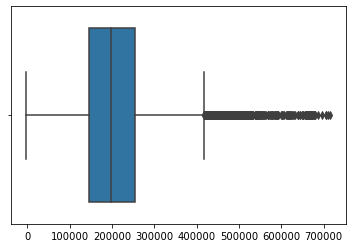

In [23]:
sns.boxplot(predicted)

Text(0.5, 1.0, 'Relationship between predictions and housing price')

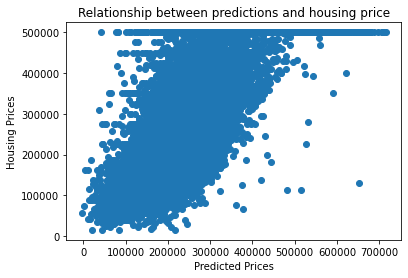

In [24]:
plt.scatter(predicted, y)
plt.xlabel("Predicted Prices")
plt.ylabel("Housing Prices")
plt.title("Relationship between predictions and housing price")

### Evaluate Model: the Coefficient of Determination ( 𝑅2 ) and F-Statistic

In [25]:
from sklearn.metrics import r2_score
r2score = r2_score(y, predicted)
print("The coefficient of determination (R^2) is " + str(r2score) + " which is very close to the statsmodel (0.579)")

The coefficient of determination (R^2) is 0.5788700138901641 which is very close to the statsmodel (0.579)


In [26]:
# Total data rows
N = 20640
# Number of columns
K = 5

In [27]:
fstat = (r2score/(1-r2score))*((N-K-1)/K)
print("The f-statistic is " + str(fstat) + ", which is very close to the statsmodel (5673)")

The f-statistic is 5672.5496927660715, which is very close to the statsmodel (5673)


# Different Models Using Columns [latitude, housing_median_age, total_rooms, median_income, ocean_proximity]

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score   

In [29]:
def display_statistics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("rmse: " + str(rmse))
    
    r2score = r2_score(actual, predicted)
    print("The coefficient of determination (R^2): " + str(r2score))
    
    fstat = (r2score/(1-r2score))*((N-K-1)/K)
    print("The f-statistic: " + str(fstat))

In [30]:
def display_scores(model, data, actual):
    scores = cross_val_score(model, data, actual,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
   
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std()) 

## Linear Regression

In [31]:
display_statistics(y, predicted)
print()
display_scores(lm, X, y)

rmse: 74883.62700737722
The coefficient of determination (R^2): 0.5788700138901641
The f-statistic: 5672.5496927660715

Scores: [97122.72256311 66111.95664509 99845.57630707 62152.50797046
 88174.3445149  70376.78507963 60820.23276587 89544.03973963
 89317.60654721 57696.92520319]
Mean: 78116.26973361624
Standard deviation: 15380.455540263507


## Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

display_statistics(y, tree_model.predict(X))
print()
display_scores(tree_model, X, y)

rmse: 0.0
The coefficient of determination (R^2): 1.0
The f-statistic: inf



<ipython-input-29-936ae5a6b502>:9: RuntimeWarning: divide by zero encountered in double_scalars
  fstat = (r2score/(1-r2score))*((N-K-1)/K)


Scores: [132654.56043043  81125.48708138 111957.5815908  116484.41926227
 103902.14534341  97638.49079761  82051.81395952 144986.40417758
 106951.10866037  75233.83740589]
Mean: 105298.58487092417
Standard deviation: 21412.46249874904


## RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X, y)

display_statistics(y, forest_model.predict(X))
print()
display_scores(forest_model, X, y)

rmse: 22966.279606795208
The coefficient of determination (R^2): 0.9603882783140004
The f-statistic: 100054.48332600555

Scores: [114630.25745274  55514.31023768  89723.28315451  89797.13887181
  86490.18891391  74118.98050462  63902.36888897 105670.78135069
  81937.89173565  55246.72500823]
Mean: 81703.19261187993
Standard deviation: 18898.764460161747


## SVR

In [34]:
from sklearn.svm import SVR

svm_model = SVR(kernel="linear")
svm_model.fit(X, y)

display_statistics(y, svm_model.predict(X))
print()
display_scores(svm_model, X, cleaned_housing_price.median_house_value)

rmse: 93980.3725961916
The coefficient of determination (R^2): 0.3366896892459592
The f-statistic: 2094.722465569272

Scores: [ 72652.81626624  86203.7672847  114217.28202261  68767.51186771
 120673.01042884  98424.39268926  75789.50667374 108482.52336338
 139308.51898625  72954.71563345]
Mean: 95747.40452161884
Standard deviation: 23020.691551253698


# Fine-tune Model

## Using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_model1 = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_model1, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(cleaned_housing_price_data_only, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [38]:
forest_model1_best_estimator = grid_search.best_estimator_
display_statistics(y, forest_model1_best_estimator.predict(cleaned_housing_price_data_only))
print()
display_scores(forest_model1_best_estimator, cleaned_housing_price_data_only, y)

rmse: 19239.842088896483
The coefficient of determination (R^2): 0.9721999594320297
The f-statistic: 144319.02654151528

Scores: [96705.03896092 46628.92910645 67769.67341467 58125.11580191
 66252.03160011 64862.8014531  49060.69994422 77977.88394685
 84656.70950476 50223.20576433]
Mean: 66226.20894973067
Standard deviation: 15528.741165912557


In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

82961.83808203282 {'max_features': 2, 'n_estimators': 3}
73360.54888996496 {'max_features': 2, 'n_estimators': 10}
70584.66192070322 {'max_features': 2, 'n_estimators': 30}
82267.11475782785 {'max_features': 4, 'n_estimators': 3}
76113.35997048688 {'max_features': 4, 'n_estimators': 10}
73674.72741972927 {'max_features': 4, 'n_estimators': 30}
83161.14130501203 {'max_features': 6, 'n_estimators': 3}
75751.60647205432 {'max_features': 6, 'n_estimators': 10}
75359.49312716162 {'max_features': 6, 'n_estimators': 30}
84162.49415623867 {'max_features': 8, 'n_estimators': 3}
80242.88677733767 {'max_features': 8, 'n_estimators': 10}
78457.51147309052 {'max_features': 8, 'n_estimators': 30}
82189.9588335536 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
73311.05090765435 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
80872.78026084199 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
73451.51233098598 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [40]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.095544      0.008877         0.004987    6.300764e-04   
1        0.318759      0.037439         0.010672    2.054036e-03   
2        0.790287      0.051032         0.021346    1.486733e-03   
3        0.131455      0.005151         0.003990    9.702201e-07   
4        0.420462      0.007744         0.008378    7.981800e-04   
5        1.323676      0.142717         0.020545    2.570164e-03   
6        0.174143      0.002235         0.003586    4.851516e-04   
7        0.572462      0.004237         0.008185    4.131086e-04   
8        1.780247      0.087203         0.020739    1.153404e-03   
9        0.225623      0.008922         0.004183    3.949135e-04   
10       0.767555      0.015007         0.008578    1.014465e-03   
11       2.308045      0.062637         0.021341    2.937189e-03   
12       0.131045      0.012576         0.004997    6.184476e-04   
13       0.426062      0.029433         0.010764    2.206164e-03   
14       0.184299      0.015851         0.004413    8.022605e-04   
15       0.530783      0.003644         0.008386    5.028586e-04   
16       0.207055      0.002299         0.004168    3.923262e-04   
17       0.681773      0.013773         0.008775    3.979965e-04   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -6.622632e+09   
1             {'max_features': 2, 'n_estimators': 10}      -5.630443e+09   
2             {'max_features': 2, 'n_estimators': 30}      -5.058936e+09   
3              {'max_features': 4, 'n_estimators': 3}      -9.320091e+09   
4             {'max_features': 4, 'n_estimators': 10}      -7.000169e+09   
5             {'max_features': 4, 'n_estimators': 30}      -5.887123e+09   
6              {'max_features': 6, 'n_estimators': 3}      -6.979640e+09   
7             {'max_features': 6, 'n_estimators': 10}      -6.321360e+09   
8             {'max_features': 6, 'n_estimators': 30}      -5.905900e+09   
9              {'max_features': 8, 'n_estimators': 3}      -7.001500e+09   
10            {'max_features': 8, 'n_estimators': 10}      -6.991108e+09   
11            {'max_features': 8, 'n_estimators': 30}      -6.917959e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -7.503672e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -6.177246e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -8.398193e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -6.477642e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -7.825504e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -7.182131e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -6.576474e+09  ...    -6.882667e+09  

## Using RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_model2 = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_model2, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(cleaned_housing_price_data_only, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017DED29BE80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017DED2EE700>},
                   random_state=42, scoring='neg_mean_squared_error')

In [42]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

77117.34285312703 {'max_features': 7, 'n_estimators': 180}
77203.42455613708 {'max_features': 5, 'n_estimators': 15}
72072.75763550603 {'max_features': 3, 'n_estimators': 72}
75993.71869661631 {'max_features': 5, 'n_estimators': 21}
77152.8395834072 {'max_features': 7, 'n_estimators': 122}
72033.46939756222 {'max_features': 3, 'n_estimators': 75}
71806.14924813979 {'max_features': 3, 'n_estimators': 88}
74844.59427552746 {'max_features': 5, 'n_estimators': 100}
72134.59421734989 {'max_features': 3, 'n_estimators': 150}
97296.9355032164 {'max_features': 5, 'n_estimators': 2}


In [43]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13728971, 0.13134368, 0.05455066, 0.06096521, 0.06177381,
       0.04724402, 0.3674125 , 0.13942041])

In [44]:
final_model = grid_search.best_estimator_

#X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(cleaned_housing_price_data_only)

final_mse = mean_squared_error(y, final_predictions)

display_statistics(y, final_predictions)
print()
display_scores(final_model, cleaned_housing_price_data_only, y)

rmse: 19239.842088896483
The coefficient of determination (R^2): 0.9721999594320297
The f-statistic: 144319.02654151528

Scores: [96705.03896092 46628.92910645 67769.67341467 58125.11580191
 66252.03160011 64862.8014531  49060.69994422 77977.88394685
 84656.70950476 50223.20576433]
Mean: 66226.20894973067
Standard deviation: 15528.741165912557


In [45]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([18824.6271756 , 19646.28359032])

In [46]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(18824.62717559582, 19646.283590315903)

In [47]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(18824.65179418866, 19646.26000130422)